In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
import torch
from tqdm import tqdm
from PIL import Image
import torchvision.transforms as T

In [2]:
import os, sys
sys.path.insert(0,os.path.realpath(os.path.pardir))

In [3]:
device = "cuda"

In [4]:
# pic2 = cv2.imread(f"{sys.path[0]}/data/bkk_radar_images/bkk_radar_images_1/1592461954.png")

# plt.figure(figsize=(10, 10), dpi=80)
# plt.imshow(cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB))
# plt.show()

In [5]:
def radar_colormap():
    nws_reflectivity_colors = np.array([
    (165, 151, 95), # ND
    (0, 255, 128), # 5.5
    (0, 255, 0), # 10
    (0, 175, 0), # 15
    (0, 150, 50), # 20
    (255, 255, 0), # 25
    (255, 200, 0), # 30
    (255, 170, 0), # 35
    (255, 85, 0), # 40
    (255, 0, 0), # 45
    (255, 0, 100), # 50
    (255, 0, 255), # 55
    (255, 128, 255), # 60
    (255, 200, 255), # 65
    (255, 225, 255), # 70
    (255, 255, 255) # 75
    ])
    return torch.tensor(nws_reflectivity_colors).to(device)
    # return mpl.colors.ListedColormap(nws_reflectivity_colors)

dBZmap = torch.tensor([0,5.5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]).to(device)
dBZmap = dBZmap * 255. / 75.

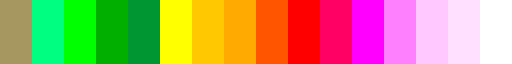

In [6]:
mpl.colors.ListedColormap(radar_colormap().cpu().numpy()/255)

In [9]:
def color2dBZ(rgb, dBZmap):
    w, h, c = rgb.shape
    rgb = rgb.reshape(-1, c)
    rgb = torch.Tensor(rgb).to(device)
    cmap = radar_colormap().unsqueeze(0).to(device)
    repeated_rgb = rgb.unsqueeze(1).repeat(1,16,1).to(device)
    rgb_diff2 = ((repeated_rgb - cmap)**2).mean(axis=2)
    return dBZmap[torch.argmin(rgb_diff2,axis=1).to(device)].reshape(w, h, 1)

transform = T.ToPILImage()

def convert_n_save(idx):
    data = filenames.iloc[idx]
    rgb_img = Image.open(f"..{data.FolderPath}{data.FileName}")
    rgb_img = np.asarray(rgb_img)
    dBZ_img = color2dBZ(rgb_img, dBZmap)
    dBZ_img = transform(dBZ_img.permute(2,0,1))
    dBZ_img.save(f"{newPath}{data.FileName}")

In [ ]:
# pic3 = color2dBZ(pic2, dBZmap)

In [10]:
# fig = plt.figure(figsize=(20,10), dpi=80)

# plt.subplot(121)
# plt.axis('off')
# plt.imshow(cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB))

# plt.subplot(122)
# plt.axis('off')
# plt.imshow(pic3, cmap='gray')
# plt.show()

In [11]:
# x, y, z = np.ogrid[:2034, :2048, :1]

# circle_mask = np.where((x-2034/2)**2 + (y-2048/2)**2 <= (2034/2)**2, 0, 1)

# plt.axis('off')
# plt.imshow(circle_mask, cmap='gray')
# plt.show()

In [12]:
# exclude_mask = np.logical_or(circle_mask,pic3)
# plt.imshow(exclude_mask, cmap='gray')
# plt.show()

In [13]:
# filenames = pd.read_csv("../data/bkk_all.csv")[['DateTime','FolderPath','FileName']]
# filenames['FolderPath'] = "/data/bkk_radar_images"+filenames['FolderPath'].str[5:]
# filenames.to_csv("../data/bkk_all.csv")

In [31]:
filenames = pd.read_csv("../data/bkk_all.csv")[['DateTime','FolderPath','FileName']]
filenames_1 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_1/']
filenames_2 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_2/']
filenames_3 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_3/']
filenames_4 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_4/']
filenames_5 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_5/']
filenames_6 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_6/']
filenames_7 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_7/']
filenames_8 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_8/']
filenames_9 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_9/']
filenames_10 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_10/']
filenames_11 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_11/']
filenames_12 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_12/']
filenames_13 = filenames[filenames['FolderPath']=='/data/bkk_radar_images/bkk_radar_images_13/']

,DateTime,FolderPath,FileName
23976,2020-10-05 04:50:00,/data/bkk_radar_images/bkk_radar_images_6/,1601873498.png
23977,2020-10-05 04:55:00,/data/bkk_radar_images/bkk_radar_images_6/,1601873800.png
23978,2020-10-05 05:00:00,/data/bkk_radar_images/bkk_radar_images_6/,1601874094.png
23979,2020-10-05 05:05:00,/data/bkk_radar_images/bkk_radar_images_6/,1601874400.png
23980,2020-10-05 05:10:00,/data/bkk_radar_images/bkk_radar_images_6/,1601874696.png
...,...,...,...
28835,2020-10-27 11:55:00,/data/bkk_radar_images/bkk_radar_images_6/,1603799792.png
28836,2020-10-27 12:00:00,/data/bkk_radar_images/bkk_radar_images_6/,1603800096.png
28837,2020-10-27 12:05:00,/data/bkk_radar_images/bkk_radar_images_6/,1603800392.png
28838,2020-10-27 12:10:00,/data/bkk_radar_images/bkk_radar_images_6/,1603800694.png


In [ ]:
def color2dBZ(rgb, dBZmap):
    w, h, c = rgb.shape
    rgb = rgb.reshape(-1, c)[:,:3]
    rgb = torch.Tensor(rgb).to(device)
    cmap = radar_colormap().unsqueeze(0).to(device)
    repeated_rgb = rgb.unsqueeze(1).repeat(1,16,1).to(device)
    # print(repeated_rgb.shape, cmap.shape)
    rgb_diff2 = ((repeated_rgb - cmap)**2).mean(axis=2)
    return dBZmap[torch.argmin(rgb_diff2,axis=1).to(device)].reshape(w, h, 1)

In [ ]:
newPath = "../data/bkk_radar_images_dBZ/bkk_radar_images_dBZ_6/"

for idx in tqdm(range(filenames.shape[0])):
    convert_n_save(idx)

100%|██████████| 4837/4837 [14:11<00:00,  5.68it/s]
